#### 线性SVM分类

两分类数据集：
$$ X = \left\{ \left(\begin{matrix}1\\1 \end{matrix} \right), \left(\begin{matrix}2\\2 \end{matrix} \right), \left(\begin{matrix}2\\0 \end{matrix} \right), \left(\begin{matrix}0\\0 \end{matrix} \right), \left(\begin{matrix}1\\0 \end{matrix} \right), \left(\begin{matrix}0\\1 \end{matrix} \right) \right\} $$
类别标记：
$$ Y = \{-1,-1,-1,+1,+1,+1\} $$

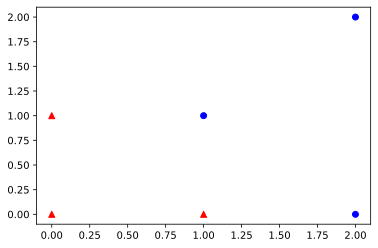

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1,1],[2,2],[2,0],[0,0],[1,0],[0,1]])
y = np.array([-1,-1,-1,+1,+1,+1])

plt.plot(X[0:3,0],X[0:3,1],'bo')
plt.plot(X[3:6,0],X[3:6,1],'r^')

plt.show()

**求解SVM原始优化问题**

w: [[-1.99957511 -1.99940016]]
b: [2.9992377]


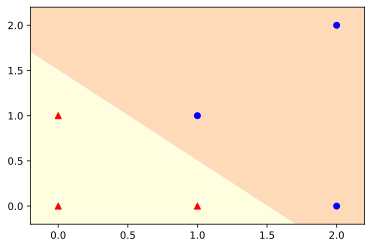

In [5]:
from sklearn.svm import LinearSVC
from plot_decision_boundary import plot_decision_boundary

CLF = LinearSVC(dual=False,C=10000).fit(X, y)

print("w:", CLF.coef_)
print("b:",CLF.intercept_)

plt.plot(X[0:3,0],X[0:3,1],'bo')
plt.plot(X[3:6,0],X[3:6,1],'r^')

plot_decision_boundary(CLF,axis=[-0.2,2.2,-0.2,2.2])
plt.show()

**求解SVM对偶优化问题**

+ 显示支持向量及Lagrange系数
+ 显示判别函数的权值及偏置

α of support vectors: [[-2. -2.  4.]]
ID of support vectors: [0 2 4]

w: [[-2. -2.]]
b: [3.]


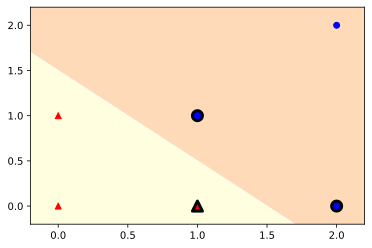

In [6]:
from sklearn.svm import SVC

CLF = SVC(C=10000,kernel='linear').fit(X,y)

print(chr(945),"of support vectors:", CLF.dual_coef_)
print("ID of support vectors:", CLF.support_)

print("\nw:",CLF.coef_)
print("b:",CLF.intercept_)

plt.plot(X[0:3,0],X[0:3,1],'bo')
plt.plot(X[3:6,0],X[3:6,1],'r^')

id = np.where(CLF.dual_coef_[0]<0)
id_support = CLF.support_[id]
plt.plot(X[id_support,0],X[id_support,1],'bo',markeredgecolor='black',markeredgewidth=3,markersize=10)
id = np.where(CLF.dual_coef_[0]>0)
id_support = CLF.support_[id]
plt.plot(X[id_support,0],X[id_support,1],'r^',markeredgecolor='black',markeredgewidth=3,markersize=10)

plot_decision_boundary(CLF,axis=[-0.2,2.2,-0.2,2.2])
plt.show()